In [1]:
from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
import seaborn as sns
import pandas as pd
import json

In [2]:
def top_keywords(keyword_lists, top=5):
    
    return Counter(list(chain.from_iterable(keyword_lists))).most_common(top)

In [3]:
def gen_heatchart(tk):
    
    data = []

    for row_k in tk:
        row_vals = []
        for col_k in tk:
            df_a = df[df.keywords.apply(lambda x: row_k in x)]
            df_b = df_a[df_a.keywords.apply(lambda x: col_k in x)]
            perc = int((len(df_b) / len(df_a)) * 100)
            row_vals.append(perc)
        data.append(row_vals)

    d = pd.DataFrame(data, index=[*tk], columns=[*tk])

    plt.figure(figsize=(15, 10))

    corr = d.corr()
    ax = sns.heatmap(corr, center=0,cmap='bone_r', square=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [31]:
events = json.load(open('gdelt_hate.json', 'rb'))

In [32]:
df = pd.DataFrame.from_dict(events).transpose()

keys = df['keywords'].apply(pd.Series)
keys = keys.rename(columns = lambda x : 'k_' + str(x))
df  = pd.concat([df[:], keys[:]], axis=1)

df.reset_index(inplace=True)
df.rename(index=str, columns={"index": "start_end"}, inplace=True)

df['start'] = df['start_end'].apply(lambda x: x[:8])
df['end']   = df['start_end'].apply(lambda x: x[-8:])
df['year']  = df['start_end'].apply(lambda x: x[:4])

df['articles'] = df['articles'].astype('int64')
df['length']   = df['length'].astype('int64')
df['tone']     = df['tone'].astype('int64')

df.fillna(0, inplace=True)
df.sort_values('start_end', inplace=True)

df

,start_end,articles,keywords,length,tone,k_0,k_1,k_2,k_3,k_4,...,k_7,k_8,k_9,k_10,k_11,k_12,k_13,start,end,year
0,20150314_20150411,1607,"[LAW, INDIANA, STATE, RELIGIOUS, FREEDOM]",27,-4,LAW,INDIANA,STATE,RELIGIOUS,FREEDOM,...,0,0,0,0,0,0,0,20150314,20150411,2015
1,20150413_20150420,652,"[COLLEGE, SHOOTING, STANCIL, POSSIBLE, COMMUNI...",6,-6,COLLEGE,SHOOTING,STANCIL,POSSIBLE,COMMUNITY,...,0,0,0,0,0,0,0,20150413,20150420,2015
2,20150503_20150510,267,"[SPEECH, TEXAS, GELLER, MUSLIM, RIGHT, EVENT, ...",8,-5,SPEECH,TEXAS,GELLER,MUSLIM,RIGHT,...,0,0,0,0,0,0,0,20150503,20150510,2015
3,20150617_20150627,15581,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]",11,-6,CHURCH,CHARLESTON,SHOOTING,SOUTH,WHITE,...,0,0,0,0,0,0,0,20150617,20150627,2015
4,20150630_20150703,849,"[CHURCH, BLACK, FIRES, CHURCHES, SOUTH]",4,-6,CHURCH,BLACK,FIRES,CHURCHES,SOUTH,...,0,0,0,0,0,0,0,20150630,20150703,2015
5,20150728_20150811,737,"[CHURCH, FEDERAL, STATE, WHITE, GUILTY, CONFED...",14,-5,CHURCH,FEDERAL,STATE,WHITE,GUILTY,...,ROOF,FLAG,SOUTH,COURT,MAN,0,0,20150728,20150811,2015
6,20150817_20150829,422,"[MUSLIM, MAN, WHITE, FBI, COMMUNITY, WOMEN, RI...",13,-5,MUSLIM,MAN,WHITE,FBI,COMMUNITY,...,STATE,QUENTIN,TARANTINO,COUNTRY,0,0,0,20150817,20150829,2015
7,20150902_20150904,445,"[BLACK, LIVES, MATTER, MAN, WHITE, INSULTS, TH...",3,-6,BLACK,LIVES,MATTER,MAN,WHITE,...,CITY,RACIAL,CHURCH,STATE,ALABAMA,COUNTY,MEN,20150902,20150904,2015
8,20150909_20150913,555,"[SIKH, MUKKER, COUNTRY, SIKHAMERICAN, CAR, LAD...",5,-8,SIKH,MUKKER,COUNTRY,SIKHAMERICAN,CAR,...,0,0,0,0,0,0,0,20150909,20150913,2015
9,20150915_20150917,494,"[SIKH, MAN, SINGH, ELDERLY, GARCIA, COMMUNITY,...",3,-7,SIKH,MAN,SINGH,ELDERLY,GARCIA,...,YOURE,0,0,0,0,0,0,20150915,20150917,2015


In [33]:
print(df.year.value_counts())
print(df.year.count())

2017    21
2016    20
2018    15
2015    13
Name: year, dtype: int64
69


In [34]:
gb = df.groupby('year').agg(['mean', 'median', 'min', 'max'])
gb.to_csv('yearly_agg.csv')
gb

articles                         length                     tone  \
             mean  median  min    max       mean median min max      mean   
year                                                                        
2015  2241.461538   737.0  267  15581  13.000000      8   3  46 -5.769231   
2016  1774.750000   916.5  286   7490   7.450000      6   3  23 -5.450000   
2017  2662.904762   966.0  272  17702  10.666667      6   3  34 -5.857143   
2018  2029.733333  1647.0  301   8782  12.133333      8   3  42 -5.933333   

                     
     median min max  
year                 
2015   -6.0  -8  -4  
2016   -5.5  -6  -4  
2017   -6.0  -8  -4  
2018   -6.0  -7  -5

In [8]:
df_25 = df[df.length <= df.length.quantile(.25)]
print(len(df_25))
Counter(chain(*df_25.keywords)).most_common(10)

22


[('WHITE', 13),
 ('MAN', 10),
 ('BLACK', 6),
 ('MUSLIM', 6),
 ('CHURCH', 5),
 ('STATE', 5),
 ('LAW', 5),
 ('WOMEN', 4),
 ('SIKH', 3),
 ('COMMUNITY', 3)]

In [9]:
df_75 = df[df.length >= df.length.quantile(.75)]
print(len(df_75))
Counter(chain(*df_75.keywords)).most_common(10)

19


[('WHITE', 12),
 ('MAN', 10),
 ('STATE', 8),
 ('MUSLIM', 8),
 ('SPEECH', 8),
 ('WOMEN', 3),
 ('MOSQUE', 3),
 ('SHOOTING', 3),
 ('JEWISH', 3),
 ('LAW', 2)]

In [10]:
iqr = df[df['length'].between(df['length'].quantile(.25), df['length'].quantile(.75), inclusive=False)]
print(len(iqr))
Counter(chain(*iqr.keywords)).most_common(10)

28


[('WHITE', 14),
 ('MUSLIM', 11),
 ('MAN', 11),
 ('LAW', 9),
 ('STATE', 8),
 ('WOMEN', 5),
 ('COMMUNITY', 4),
 ('BLACK', 4),
 ('SPEECH', 3),
 ('TEXAS', 3)]

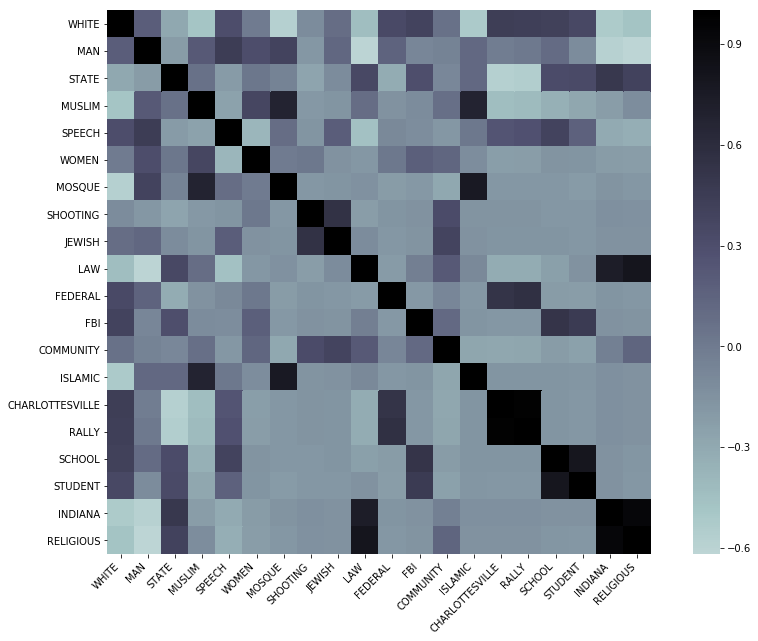

In [11]:
gen_heatchart([k[0] for k in Counter(chain(*df_75.keywords)).most_common(20)])

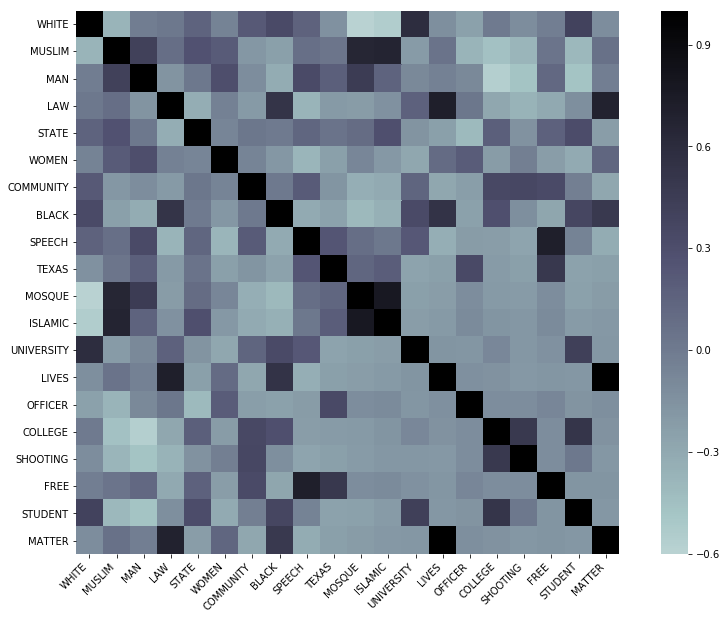

In [12]:
gen_heatchart([k[0] for k in Counter(chain(*iqr.keywords)).most_common(20)])

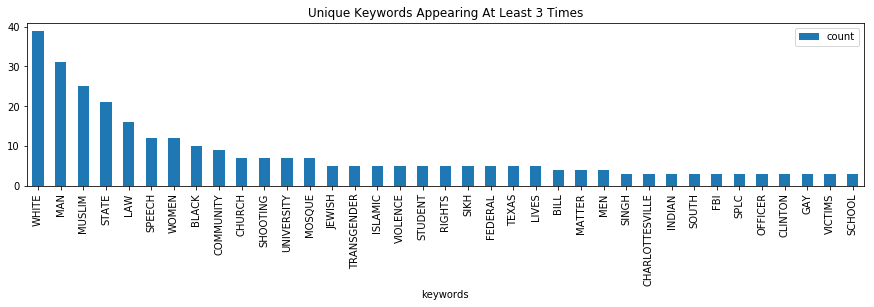

In [13]:
all_keywords = list(chain(*[k['keywords'] for k in events.values()]))

tk_df = pd.DataFrame([[a, b] for a, b in Counter(all_keywords).items()], columns=['keywords', 'count'])
tk_df = tk_df[tk_df['count'] >= 3]

tk_df.sort_values('count', inplace=True, ascending=False)
tk_df.plot(x='keywords', y='count', kind='bar', title='Unique Keywords Appearing At Least 3 Times', figsize=(15, 3))

# How Do Keywords Relate within Windows

In [ ]:
w_df =df[df.keywords.apply(lambda x: 'WHITE' in x)]
w_df.agg({'movement': ['min', 'max', 'mean', 'median', 'count']})

In [15]:
w_df =df[df.keywords.apply(lambda x: 'BLACK' in x)]
w_df.agg({'movement': ['min', 'max', 'mean', 'median', 'count']})

,movement
min,9.0
max,156.0
mean,37.7
median,26.0
count,10.0


In [18]:
b =df[df.keywords.apply(lambda x: 'BLACK' in x)]
b.sort_values('length', inplace=True, ascending=False)
b

C:\Users\jeff8977\AppData\Local\Continuum\miniconda3\envs\gdelt\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,start_end,articles,keywords,length,movement,tone,k_0,k_1,k_2,k_3,...,k_7,k_8,k_9,k_10,k_11,k_12,k_13,start,end,year
21,20160704_20160714,4627,"[OFFICERS, DALLAS, BLACK, LAW, LIVES]",11,51,-6,OFFICERS,DALLAS,BLACK,LAW,...,0,0,0,0,0,0,0,20160704,20160714,2016
67,20181125_20181202,1971,"[STATE, WHITE, SWASTIKAS, BLACK, COLLEGE, STUD...",8,156,-7,STATE,WHITE,SWASTIKAS,BLACK,...,MISSISSIPPI,RACIST,VANDALISM,0,0,0,0,20181125,20181202,2018
17,20160503_20160508,389,"[IOWA, STUDENTS, UNIVERSITY, STUDENT, BLACK, W...",6,39,-6,IOWA,STUDENTS,UNIVERSITY,STUDENT,...,MUSLIM,ASSAULT,OWENS,0,0,0,0,20160503,20160508,2016
47,20170918_20170923,350,"[STATE, SPEECH, MAN, WHITE, VIOLENCE, DONT, CO...",6,27,-6,STATE,SPEECH,MAN,WHITE,...,JEWISH,LAW,MEN,BLACK,UNIVERSITY,0,0,20170918,20170923,2017
40,20170501_20170505,812,"[RELIGIOUS, WHITE, UNIVERSITY, LAW, COMMUNITY,...",5,31,-6,RELIGIOUS,WHITE,UNIVERSITY,LAW,...,GAY,MUSLIM,RIGHTS,TREENE,CHURCH,STANG,0,20170501,20170505,2017
4,20150630_20150703,849,"[CHURCH, BLACK, FIRES, CHURCHES, SOUTH]",4,25,-6,CHURCH,BLACK,FIRES,CHURCHES,...,0,0,0,0,0,0,0,20150630,20150703,2015
25,20160830_20160902,699,"[WHITE, LIVES, MATTER, MUSLIM, LAW, MOVEMENT, ...",4,17,-6,WHITE,LIVES,MATTER,MUSLIM,...,BLACK,DEATH,POVERTY,SOUTHERN,KHANAM,0,0,20160830,20160902,2016
32,20161221_20161224,987,"[MISSISSIPPI, CHURCH, MUSLIM, MAN, WOMEN, BLAC...",4,13,-6,MISSISSIPPI,CHURCH,MUSLIM,MAN,...,STATE,0,0,0,0,0,0,20161221,20161224,2016
7,20150902_20150904,445,"[BLACK, LIVES, MATTER, MAN, WHITE, INSULTS, TH...",3,9,-6,BLACK,LIVES,MATTER,MAN,...,CITY,RACIAL,CHURCH,STATE,ALABAMA,COUNTY,MEN,20150902,20150904,2015
64,20181016_20181018,1442,"[MAN, WHITE, BLACK, BUSH, SHOT, FRIGHTENED, KE...",3,9,-6,MAN,WHITE,BLACK,BUSH,...,GROCERY,RACE,STORE,TEXAS,0,0,0,20181016,20181018,2018


In [37]:
w = w[df.length <= 11]
w

C:\Users\jeff8977\AppData\Local\Continuum\miniconda3\envs\gdelt\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,start_end,articles,keywords,length,tone,k_0,k_1,k_2,k_3,k_4,...,k_7,k_8,k_9,k_10,k_11,k_12,k_13,start,end,year
3,20150617_20150627,15581,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]",11,-6,CHURCH,CHARLESTON,SHOOTING,SOUTH,WHITE,...,0,0,0,0,0,0,0,20150617,20150627,2015
23,20160812_20160820,1779,"[MUSLIM, IMAM, MAN, MOSQUE, SHOT]",9,-6,MUSLIM,IMAM,MAN,MOSQUE,SHOT,...,0,0,0,0,0,0,0,20160812,20160820,2016
57,20180310_20180318,1601,"[WHITE, WOMEN, STATE, IMMIGRATION, MUSLIM, CAL...",9,-5,WHITE,WOMEN,STATE,IMMIGRATION,MUSLIM,...,DONT,0,0,0,0,0,0,20180310,20180318,2018
2,20150503_20150510,267,"[SPEECH, TEXAS, GELLER, MUSLIM, RIGHT, EVENT, ...",8,-5,SPEECH,TEXAS,GELLER,MUSLIM,RIGHT,...,0,0,0,0,0,0,0,20150503,20150510,2015
10,20151101_20151108,823,"[TARANTINO, TARANTINOS, QUENTIN, IM, WEINSTEIN...",8,-6,TARANTINO,TARANTINOS,QUENTIN,IM,WEINSTEIN,...,0,0,0,0,0,0,0,20151101,20151108,2015
14,20160202_20160209,619,"[MUSLIM, OBAMA, STATE, MOSQUE, CRUZ, MARTIN, T...",8,-5,MUSLIM,OBAMA,STATE,MOSQUE,CRUZ,...,TWITTER,ISLAMIC,0,0,0,0,0,20160202,20160209,2016
58,20180402_20180409,1647,"[WOMEN, YOUTUBE, COMPANY, SAN, AGHDAM, SHOOTER...",8,-6,WOMEN,YOUTUBE,COMPANY,SAN,AGHDAM,...,HEADQUARTERS,0,0,0,0,0,0,20180402,20180409,2018
22,20160717_20160724,1593,"[OFFICERS, LAW, ROUGE, TEXAS, BATON, OFFICER]",8,-5,OFFICERS,LAW,ROUGE,TEXAS,BATON,...,0,0,0,0,0,0,0,20160717,20160724,2016
24,20160822_20160829,878,"[CLINTON, WHITE, CAMPAIGN, HILLARY, MAN]",8,-5,CLINTON,WHITE,CAMPAIGN,HILLARY,MAN,...,0,0,0,0,0,0,0,20160822,20160829,2016
31,20161127_20161204,1847,"[MUSLIM, LETTER, MOSQUES, ISLAMIC, LETTERS, EL...",8,-5,MUSLIM,LETTER,MOSQUES,ISLAMIC,LETTERS,...,0,0,0,0,0,0,0,20161127,20161204,2016
